# **Have music listening habits changed over the last 6 years?**

### Project 1 - group 2

### Add aim of the project/ intro

## Question 1: Have the music genres people listen to changed?

In [3]:
%matplotlib inline

# import dependencies
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
# load data
spoti_df = pd.read_csv('../output_data/spotipy_data.csv')

### Top 10 genres: genres with the most number of songs in top 100 year playlists
#### In order to answer this question, we first looked at the top 10 genres for each of the 6 years in our data (2017-2022). In this analysis, the top 10 genres are defined as the genres with the largest number of songs in the top 100 for that year.

In [5]:
# create a new df where we unpack the artist genre column, so we can look at genre distribution across the years
genre_df = spoti_df
genre_df["artist genre"] = genre_df['artist genre'].apply(literal_eval)
genre_df = genre_df.explode("artist genre")

In [6]:
# group by year, and count number of songs per genre in each year
genre_by_year = genre_df.groupby("Year", as_index = True)["artist genre"].value_counts()

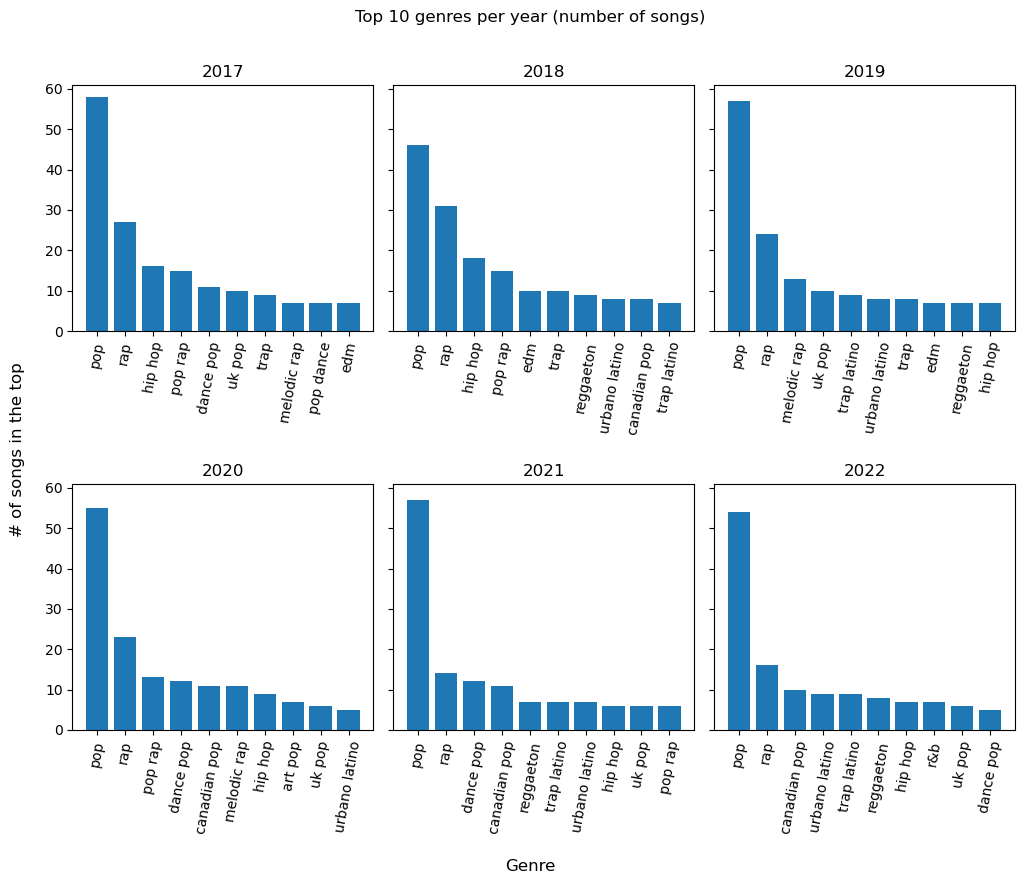

In [7]:
# create a plot showing the top 10 genres for each year

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(10, 8))
axs[0, 0].bar(genre_by_year[2017][0:10].index.to_list(), [genre_by_year[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(genre_by_year[2018][0:10].index.to_list(), [genre_by_year[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(genre_by_year[2019][0:10].index.to_list(), [genre_by_year[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(genre_by_year[2020][0:10].index.to_list(), [genre_by_year[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(genre_by_year[2021][0:10].index.to_list(), [genre_by_year[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(genre_by_year[2022][0:10].index.to_list(), [genre_by_year[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.tick_params(axis = 'x', rotation = 80)
    
# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Top 10 genres per year (number of songs)", y = 1.05)

# save figure 
fig.savefig("../output_data/top_genres_numsongs.png", bbox_inches='tight')

# plot figure
plt.show()

#### As we can see from the above plots, while some genres have stayed consistently in the top 10 (e.g. pop and rap), others fluctuate throughout the 6 years. We thus wanted to have a closer look at some of the specific genres and see how the number of songs for these genres varies by year.

In [8]:
# get number of songs per year for specific genres
years = [2017, 2018, 2019, 2020, 2021, 2022]
pop = []
rap = []
hip_hop = []
canadian_pop = []
edm = []
dance_pop = []

for year in years:
    pop.append(genre_by_year[year]["pop"])
    rap.append(genre_by_year[year]["rap"])
    hip_hop.append(genre_by_year[year]["hip hop"])
    canadian_pop.append(genre_by_year[year]["canadian pop"])
    edm.append(genre_by_year[year]["edm"])
    dance_pop.append(genre_by_year[year]["dance pop"])

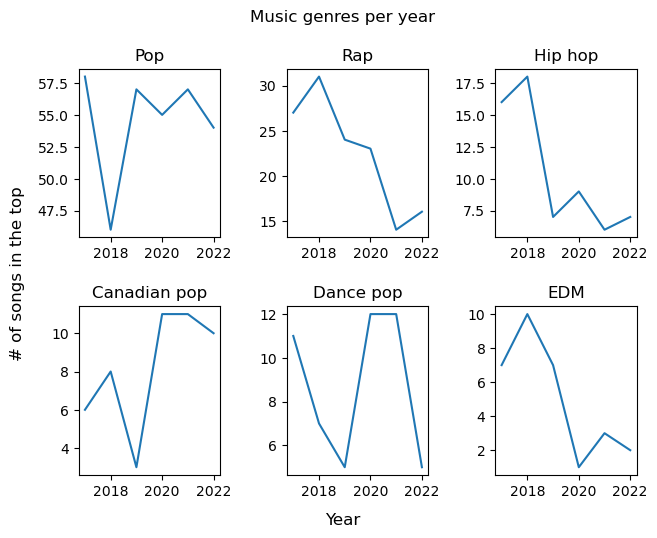

In [9]:
# create subplot
fig, axs = plt.subplots(2, 3)
axs[0,0].plot(years, pop)
axs[0,0].set_title('Pop')
axs[0,1].plot(years, rap)
axs[0,1].set_title('Rap')
axs[0,2].plot(years, hip_hop)
axs[0,2].set_title('Hip hop')
axs[1,0].plot(years, canadian_pop)
axs[1,0].set_title('Canadian pop')
axs[1,1].plot(years, dance_pop)
axs[1,1].set_title('Dance pop')
axs[1,2].plot(years, edm)
axs[1,2].set_title('EDM')

# fine tune it
fig.tight_layout(h_pad=1.8)
fig.supxlabel('Year', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Music genres per year", y = 1.05)

# save figure
fig.savefig("../output_data/specific_genres.png", bbox_inches='tight')

# plot figure
plt.show()

#### As these plots evidence, even the top 2 genres (pop and rap) fluctuate throughout the years. Other genres seem to have more consistent trends, with both hip-hop and EDM steadily decreasing from 2018 on. 

#### Two genres present curious trajectories though: whilst the number of canadian pop songs shoots up and in 2019 and remains at similar levels in the following years, the number of dance pop songs shoots up in "the covid years" (2020 and 2021), to then decrease steadily in 2022. 

#### And whilst the rise in Canadian pop can be traced to only 5 artists - with Drake accounting for nearly 50% of the songs, a lot more artists contributed to the dance pop rise in 2020 and 2021.

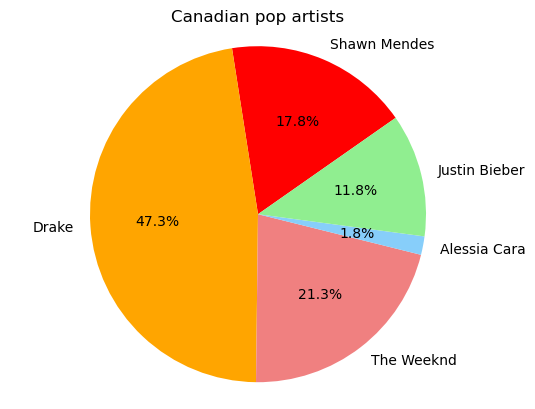

In [10]:
# get the names of canadian artists 
canadian_artists = pd.Series(genre_df[genre_df["artist genre"] == "canadian pop"]["artist name"].unique())

# and the song count for each of them
song_count = []
[song_count.append(len(genre_df[genre_df["artist name"] == artist].value_counts())) for artist in canadian_artists]
    
# define the plot colours and section separation
colors = ["red", "orange", "lightcoral", "lightskyblue", "lightgreen"]
explode = (0, 0, 0, 0, 0)

# create pie chart
plt.pie(song_count, explode=explode, labels=canadian_artists, colors=colors,
        autopct="%1.1f%%", startangle=35)
plt.axis("equal")
plt.title("Canadian pop artists")

# save fig
plt.savefig("../output_data/canadian_pop_artists.png")

# plot fig
plt.show()

In [11]:
pop_dance_artists = pd.Series(genre_df[genre_df["artist genre"] == "dance pop"]["artist name"].unique())
pop_dance_artists

0        Camila Cabello
1            Bruno Mars
2             Sean Paul
3              Dua Lipa
4                Avicii
5                  P!nk
6         Calvin Harris
7          Jason Derulo
8              DJ Snake
9            Bebe Rexha
10    Justin Timberlake
11            Lady Gaga
12             Doja Cat
13           Joel Corry
14      Black Eyed Peas
15              Shakira
16         David Guetta
dtype: object

## Top 10 genres: genres with the highest average popularity per year

#### Another way to measure top genres is to look at the genres of the most popular tracks in each year. 

#### The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

In [20]:
# calculate average popularity for each genre, each year and sort values from highest to lowest popularity
popularity_df = genre_df.groupby(["Year","artist genre"])["track popularity"].mean().sort_values(ascending=False)

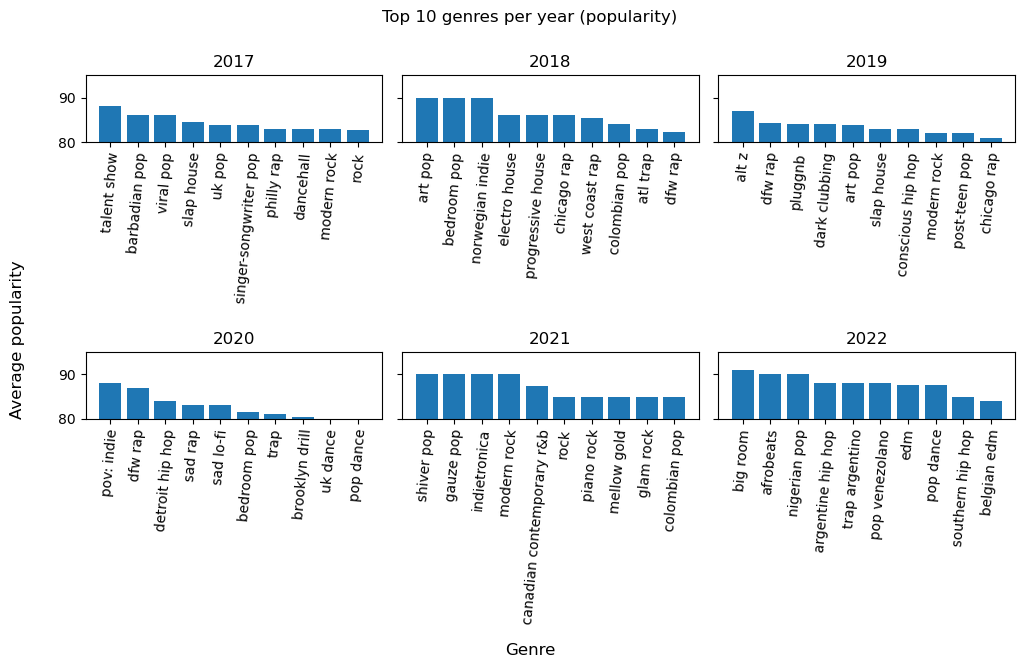

In [21]:
# plot most popular genres per year

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(10, 6))
axs[0, 0].bar(popularity_df[2017][0:10].index.to_list(), [popularity_df[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(popularity_df[2018][0:10].index.to_list(), [popularity_df[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(popularity_df[2019][0:10].index.to_list(), [popularity_df[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(popularity_df[2020][0:10].index.to_list(), [popularity_df[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(popularity_df[2021][0:10].index.to_list(), [popularity_df[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(popularity_df[2022][0:10].index.to_list(), [popularity_df[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.set_ylim([80,95])
    ax.tick_params(axis = 'x', rotation = 85)


# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('Average popularity', x = -0.02)
plt.suptitle("Top 10 genres per year (popularity)", y = 1.05)

# save figure
plt.savefig("../output_data/top_genres_popularity.png", bbox_inches='tight')

# plot figure
plt.show()

#### The picture is a lot less consistent when looking at track popularity (compared to number of songs), with no informative pattern emerging. 

## Question 2: Have the artists people listen to changed?

Here we look at the artists that released the top 10 songs in each year

In [22]:
# Group the data by 'Year' to prepare for extraction
grouped_by_year = spoti_df.groupby('Year')

# Display the first 10 artists and songs for each year
for year, group in grouped_by_year:
    top_10_year = group.head(10)
    print(f"\nTop 10 in {year}:\n")
    print(top_10_year[['artist name', 'track name']])


Top 10 in 2017:

         artist name                               track name
0         Ed Sheeran                             Shape of You
1    Imagine Dragons                                 Believer
2         Luis Fonsi                                Despacito
3  Machine Gun Kelly         Bad Things (with Camila Cabello)
4       Clean Bandit  Rockabye (feat. Sean Paul & Anne-Marie)
5     Camila Cabello                Havana (feat. Young Thug)
6    Imagine Dragons                                  Thunder
7           Maroon 5  Don't Wanna Know (feat. Kendrick Lamar)
8   The Chainsmokers                 Something Just Like This
9         Ed Sheeran                                  Perfect

Top 10 in 2018:

          artist name                                         track name
30     Kendrick Lamar                                LOVE. FEAT. ZACARI.
50             G-Eazy                              Him & I (with Halsey)
68   Hailee Steinfeld  Let Me Go (with Alesso, Florida Georgia 

In [26]:
#get top 5 most active artists per year
# Group data by Year and artist name then count occurrences and sort the values
artist_activity = spoti_df.groupby(['Year', 'artist name']).size().reset_index(name='song_count').sort_values(by=['Year', 'song_count'], ascending=[True, False])

# Get the top 5 active artists for each year
five_most_successful_artists_by_year = artist_activity.groupby('Year').head(5)

#print(five_most_successful_artists_by_year)

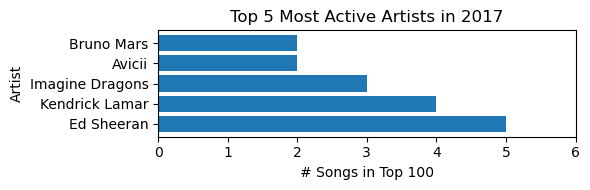

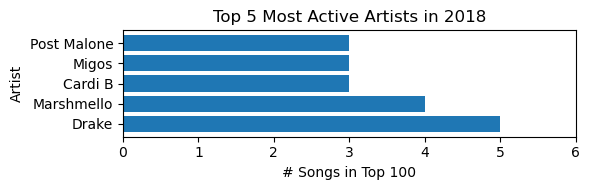

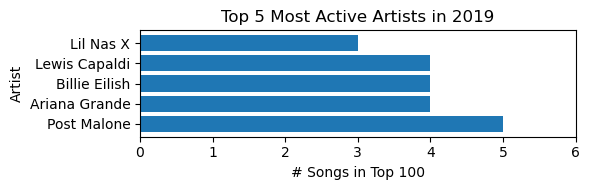

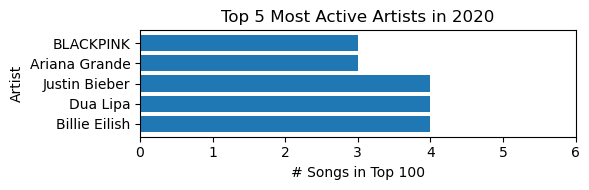

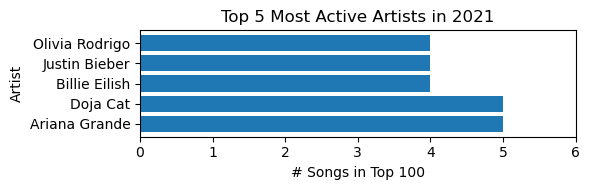

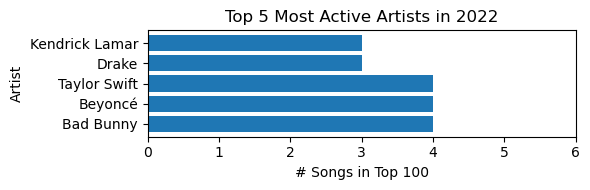

In [25]:
# Group the data by 'Year' and 'artist name' to prepare for plotting
grouped_data = five_most_successful_artists_by_year.groupby('Year')

# Create separate plots for each year
for name, group in grouped_data:
    plt.figure(figsize=(6, 2))
    plt.barh(group['artist name'], group['song_count'])
    plt.xlabel('# Songs in Top 100')
    plt.ylabel('Artist')
    plt.title(f'Top 5 Most Active Artists in {name}')
    plt.xlim(0, 6)
    plt.tight_layout()
    plt.show()

In [30]:
# Convert duration_ms to minutes rounded to 2 decimal places in a new column 'duration_minutes'
spoti_df['duration_minutes'] = spoti_df['duration_ms'] / 60000

# create top artist df
top_artists_data = spoti_df[]

# Calculate the average track duration in minutes for each of the top 5 artists
avg_duration_per_artist = top_artists_data.groupby(['Year', 'artist name'])['duration_minutes'].mean().reset_index()

for index, row in avg_duration_per_artist.iterrows():
    avg_duration_rounded = round(row['duration_minutes'], 2)
    print(f"Year: {row['Year']} | Artist: {row['artist name']} | Average Track Duration (minutes): {avg_duration_rounded}")

KeyError: 'Column not found: duration_minutes'

In [29]:
# Calculate the average track duration for each year
avg_duration_per_year = spoti_df.groupby('Year')['duration_minutes'].mean().reset_index()
print(avg_duration_per_year)

# Create an empty list to store filtered top 5 artists data
top_5_artists_data = []

for year in years:
    # Filter data for the current year
    year_data = avg_duration_per_artist[avg_duration_per_artist['Year'] == year]
    
    # Sort the data by duration_minutes column and get the top 5 artists for each year
    top_5_artists_year = year_data.nlargest(5, 'duration_minutes')
    
    # Append the top 5 artists for the current year to the list
    top_5_artists_data.append(top_5_artists_year)

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=len(years), figsize=(4, 2 * len(years)))

for i, year_data in enumerate(top_5_artists_data):
    year = years[i]
    artists = year_data['artist name']
    avg_durations = year_data['duration_minutes']
    
    # Create a bar plot for the current year
    ax = axs[i]
    ax.barh(artists, avg_durations)
    ax.set_title(f'Average Track Duration for Top 5 Artists in {year}')
    ax.set_xlabel('Average Duration (minutes)')
    ax.set_ylabel('Artist')
    ax.set_xlim(0, max(avg_durations) + 1)
    
    # Show average duration values on each bar
    for j, duration in enumerate(avg_durations):
        ax.text(duration + 0.1, j, f'{duration:.2f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

   Year  duration_minutes
0  2017          3.696559
1  2018          3.493342
2  2019          3.299158
3  2020          3.296727
4  2021          3.277226
5  2022          3.307454


NameError: name 'avg_duration_per_artist' is not defined

## Question 3: Is the duration of the most popular songs decreasing?

In [34]:
# convert milliseconds to minutes
def mil_to_minf(milliseconds):
    minutes_float = milliseconds / 60000
    return minutes_float

# # convert minutes to milliseconds
# def minf_to_mil(minutes_float):
#     milliseconds = minutes_float * 60000
#     return milliseconds

# # convert milliseconds to minute_seconds
# def mil_to_minsec(milliseconds):
#     seconds, milliseconds = divmod(milliseconds, 1000)
#     minutes, seconds = divmod(seconds, 60)
#     return minutes, seconds

# # convert minutes to minute_seconds
# def minf_to_minsec(minutes_float):
#     milliseconds = minutes_float * 60000
#     seconds, milliseconds = divmod(milliseconds, 1000)
#     minutes, seconds = divmod(seconds, 60)
#     return rminutes, seconds

In [35]:
# Average duration vs year (line)
years = []
duration_minf = []
duration_mean_minf = []
duration_median_minf = []
duration_var_minf = []
duration_std_minf = []
duration_sem_minf = []
popularity = []

for year in range (2017, 2023):
    years.append(year)
    yearly_popularity = spoti_df[spoti_df["Year"]==year]["track popularity"]
    yearly_duration_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"])
    yearly_duration_mean_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).mean()
    yearly_duration_median_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).median()
    yearly_duration_var_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).var()
    yearly_duration_std_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).std()
    yearly_duration_sem_minf = mil_to_minf(spoti_df[spoti_df["Year"]==year]["duration_ms"]).sem()

    popularity.append(yearly_popularity)
    duration_minf.append(yearly_duration_minf)
    duration_mean_minf.append(yearly_duration_mean_minf)
    duration_median_minf.append(yearly_duration_median_minf)
    duration_var_minf.append(yearly_duration_var_minf)
    duration_std_minf.append(yearly_duration_std_minf)
    duration_sem_minf.append(yearly_duration_sem_minf)

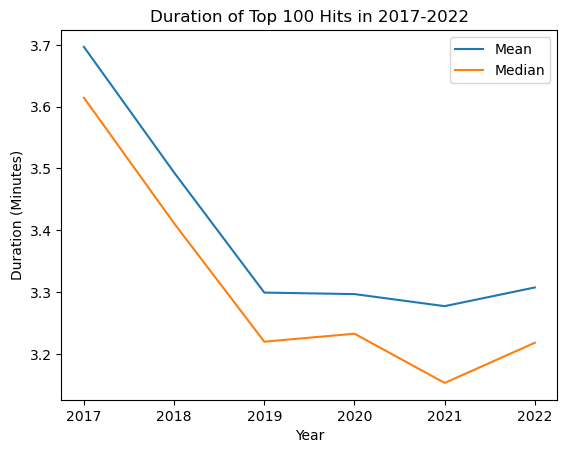

In [36]:
# Create line plot
plt.plot(years, duration_mean_minf, label="Mean")
plt.plot(years, duration_median_minf, label="Median")
plt.legend()
plt.title("Duration of Top 100 Hits in 2017-2022")
plt.xlabel("Year")
plt.ylabel("Duration (Minutes)")

# Save and show the line plot
plt.savefig("../output_data/duration_line.png")
plt.show()

In [37]:
# Verify data validity of data
# Assembling the resulting series into a DataFrame
duration_minf_df = pd.DataFrame({
                         "Year": range(2017,2023),
                         "Mean Duration (Min)": duration_mean_minf, 
                         "Median Duration (Min)": duration_median_minf, 
                         "Duration Variance": duration_var_minf, 
                         "Duration Std Dev (Min)": duration_std_minf, 
                         "Duration Std Error (Min)": duration_sem_minf})
duration_minf_df = duration_minf_df.set_index("Year")
duration_minf_df

,Mean Duration (Min),Median Duration (Min),Duration Variance,Duration Std Dev (Min),Duration Std Error (Min)
Year,,,,,
2017,3.696559,3.614300,0.377447,0.614367,0.061437
2018,3.493342,3.411150,0.473991,0.688470,0.068847
2019,3.299159,3.219750,0.411002,0.641094,0.064109
2020,3.296727,3.232642,0.387976,0.622877,0.062288
2021,3.277226,3.153033,0.832665,0.912505,0.091250
2022,3.307454,3.218025,0.444619,0.666797,0.066680


##### For both the median and mean duration of the top 100 Spotify hits of the year, there is a downward trend from 2017 to 2022. The drop from 2017 to 2019 is the most significant. The average duration of top hits in 2019 is around 0.4 minutes (~24 seconds) shorter than the hits in 2017. From 2019 to 2022, top hit songs remain similar.
##### Both the mean duration and median duration of the top songs were the lowest in 2021. The standard deviation of the data in 2021 is 0.91, which is drastically higher than in other years. We will look into the cause of the high standard deviation value.

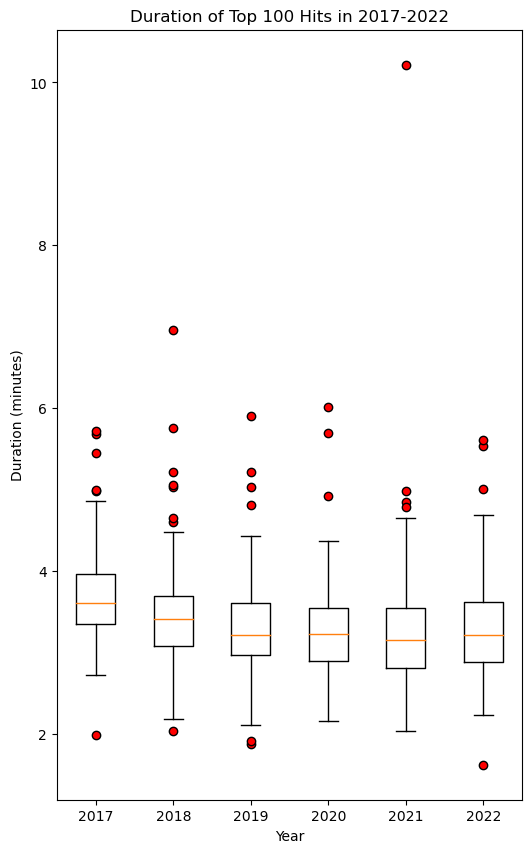

In [38]:
# Duration vs year (boxplot)
    
# Create Boxplot
fig1, ax1 = plt.subplots(figsize=(6,10))
ax1.boxplot(duration_minf, labels = years, flierprops = dict(markersize = 6, markerfacecolor = "red"))
ax1.set_title("Duration of Top 100 Hits in 2017-2022")
ax1.set_xlabel("Year")
ax1.set_ylabel("Duration (minutes)")

# Save and show the boxplot
plt.savefig("../output_data/duration_box.png")
plt.show()

In [39]:
#Finding the longest song in 2021
songs_2021_df = spoti_df[spoti_df["Year"] == 2021].copy()
songs_2021_df["duration_minutes"] = mil_to_minf(songs_2021_df["duration_ms"])
songs_2021_df = songs_2021_df[["track name","artist name","duration_minutes"]].sort_values(by = "duration_minutes", ascending = False)
songs_2021_df.iloc[0,:]

track name          All Too Well (10 Minute Version) (Taylor's Ver...
artist name                                              Taylor Swift
duration_minutes                                            10.217117
Name: 430, dtype: object

##### It is generally true that the duration of the top 100 hit songs becomes shorter from 2017 through 2022. While this trend continued during the period of COVID-19 (2020-2022), there is little evidence to show that COVID-19 is a major factor that contributes to this trend.

##### According to a 2018 study by San Francisco-based engineer Michael Tauberg, the average duration of a track has been steadily decreasing each year since 2000, though fluctuations can be seen in some years.

##### While the trend is that the duration of popular hits has become shorter in recent years, the variety remains large. Based on the boxplot, outliers can be found every year. The most significant one is "All Too Well (10 Minute Version) (Taylor's Version)" by Taylor Swift in 2021. The song is over 10 minutes long, which contributes to the high standard deviation value in that year. Despite the popularity of this long hit, the average duration of the top 100 songs is the lowest in 2021 within the 2017-2022 period.

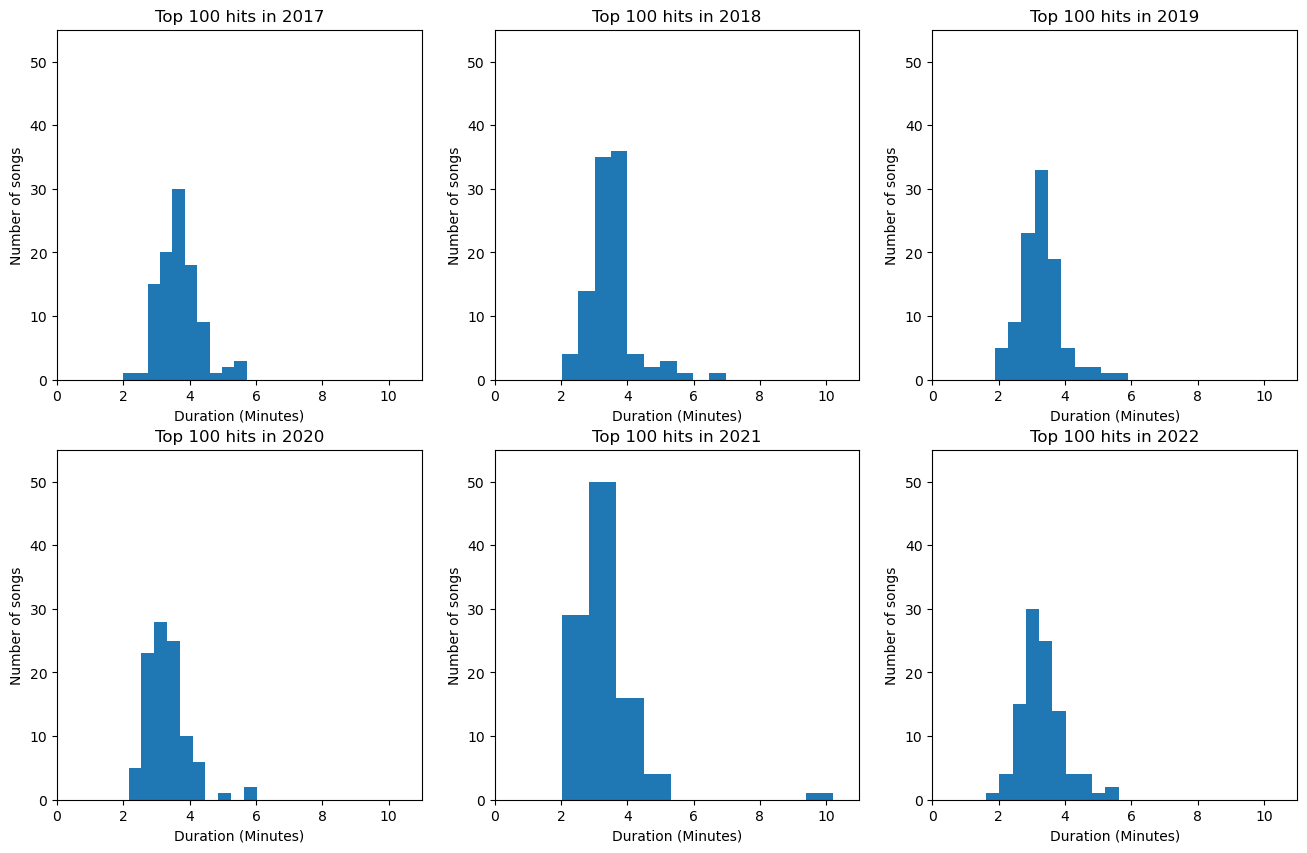

In [40]:
# Duration per year (histogram)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
custom_xlim = (0, 11)
custom_ylim = (0, 55)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel="Duration (Minutes)", ylabel="Number of songs")

for i in range(6):
    axs[divmod(i,3)[0], divmod(i,3)[1]].hist(duration_minf[i])
    axs[divmod(i,3)[0], divmod(i,3)[1]].set_title(f"Top 100 hits in {years[i]}")

# Save and show the histogram
plt.savefig("../output_data/duration_histogram.png")
plt.show()

##### From 2017 to 2022, there is a shift in the histogram to the left, suggesting that there are more shorter hit songs in 2022 when compared to 2017.

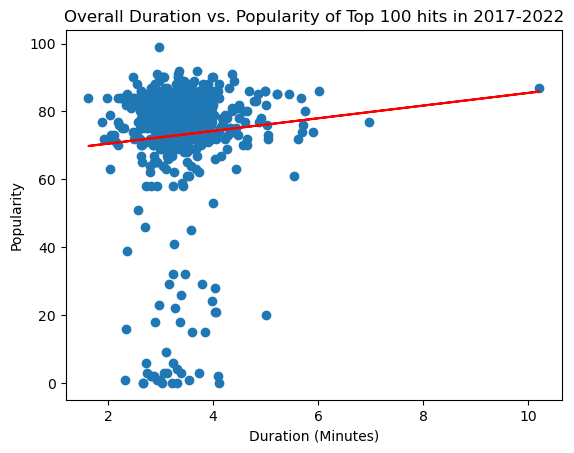

Linear equation: y = 1.87x + 66.78
The r value is: 0.07274074235422118


In [41]:
# Duration vs populartiy overall

duration_ms = spoti_df["duration_ms"]
x_axis = mil_to_minf(duration_ms)
y_axis = spoti_df["track popularity"]

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color = "red")
plt.title("Overall Duration vs. Popularity of Top 100 hits in 2017-2022")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Popularity")

# Save and show the scatter
plt.savefig("../output_data/duration_popularity_overall.png")
plt.show()
print(f"Linear equation: {line_eq}")
print(f"The r value is: {rvalue}")

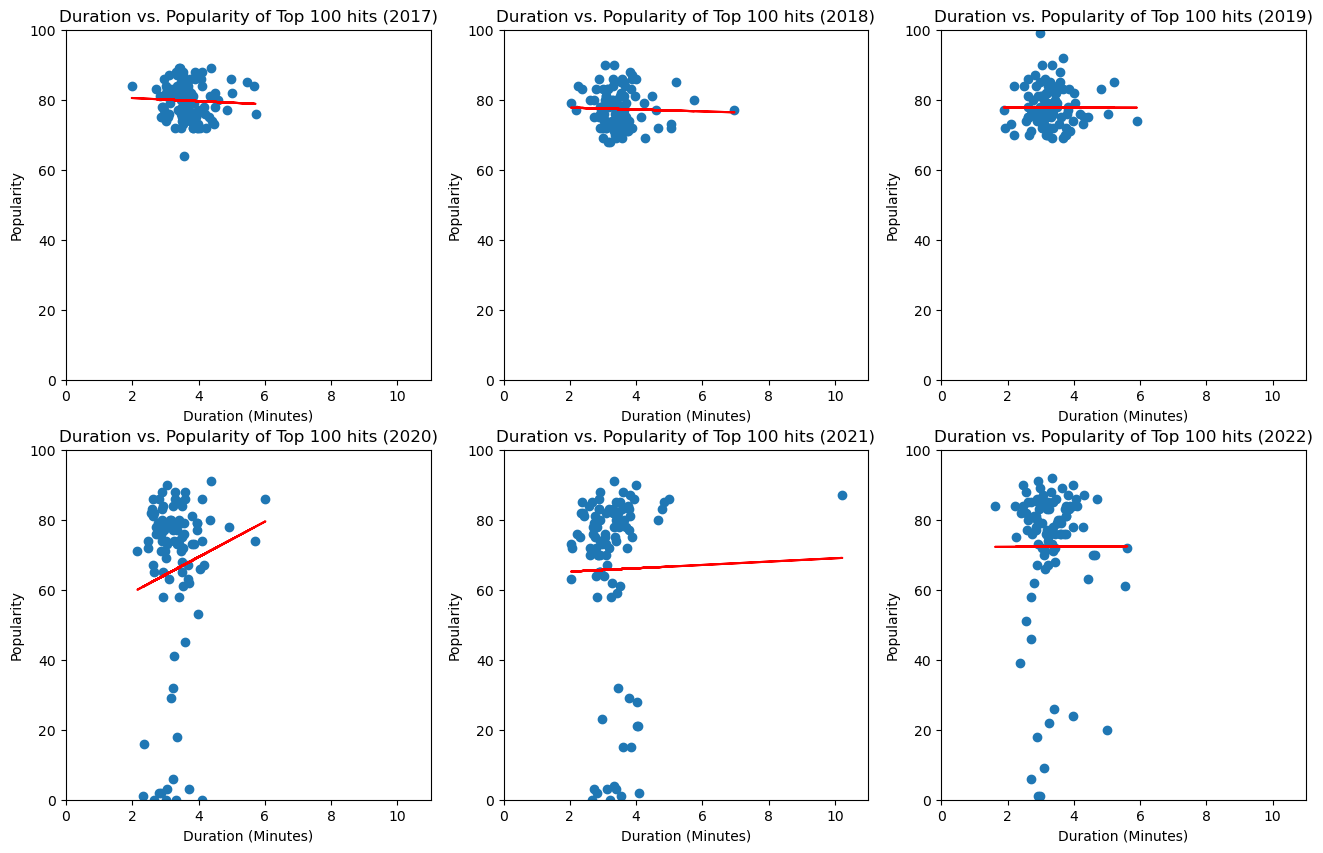

2017 	 Linear equation: y = -0.45x + 81.38 		 r-value: -0.0537
2018 	 Linear equation: y = -0.27x + 78.29 		 r-value: -0.0341
2019 	 Linear equation: y = -0.02x + 77.82 		 r-value: -0.0017
2020 	 Linear equation: y = 5.06x + 49.09 		 r-value: 0.1248
2021 	 Linear equation: y = 0.48x + 64.22 		 r-value: 0.0168
2022 	 Linear equation: y = 0.04x + 72.18 		 r-value: 0.0011


In [42]:
regress_values = []
line_eqs = []
rvalues = []
for i in range(6):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(duration_minf[i], popularity[i])
    regress_value = duration_minf[i] * slope + intercept
    regress_values.append(regress_value)
    line_eqs.append("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    rvalues.append(rvalue)

# Duration vs popularity per year (Scatter Plot)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
custom_xlim = (0, 11)
custom_ylim = (0, 100)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel="Duration (Minutes)", ylabel="Popularity")

for i in range(6):
    axs[divmod(i,3)[0], divmod(i,3)[1]].scatter(duration_minf[i], popularity[i])
    axs[divmod(i,3)[0], divmod(i,3)[1]].plot(duration_minf[i],regress_values[i], color = "red")
    axs[divmod(i,3)[0], divmod(i,3)[1]].set_title(f"Duration vs. Popularity of Top 100 hits ({years[i]})")

# Save and show the scatter
plt.savefig("../output_data/duration_popularity_year.png")
plt.show()

for i in range(6):
    print(f"{years[i]} \t Linear equation: {line_eqs[i]} \t\t r-value: {round(rvalues[i],4)}")

##### The average duration of hit songs has become shorter. That leads to the question of whether shorter songs are more popular. Scatter plots are generated to show the correlations between duration and popularity.

##### From the scatter plots, a positive r-value means longer songs are more popular, and a negative r-value means shorter songs are more popular. The R-values are negative in 2017, 2018 and 2019, and they are positive in 2020, 2021 and 2022. Nevertheless, the figures are so close to zero that the correlation between duration and popularity is close to none.

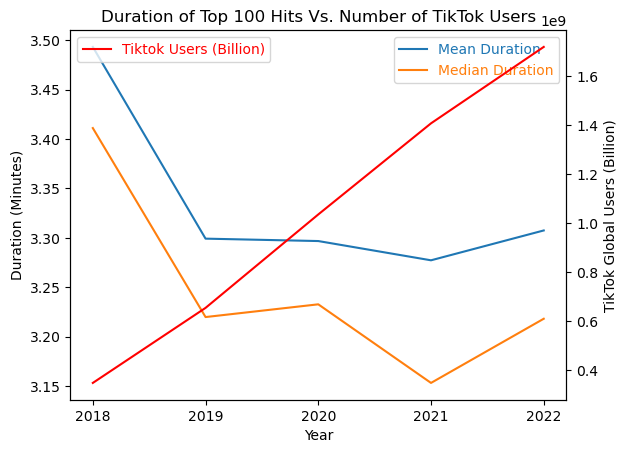

The r-value between mean duration and number of TikTok users is -0.6857056347980467.
The r-value between median duration and number of TikTok users is -0.7333031881659963.


In [43]:
# Line plot vs Tiktok
# code reference
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

tiktok_users = [347100000, 653500000, 1035000000, 1407000000, 1719000000]

fig, ax1 = plt.subplots()
ax1.set_title("Duration of Top 100 Hits Vs. Number of TikTok Users")
ax1.plot(years[1:6], duration_mean_minf[1:6], label = "Mean Duration")
ax1.plot(years[1:6], duration_median_minf[1:6], label = "Median Duration")
ax1.set_xlabel("Year")

plt.xticks(years)
ax1.set_ylabel("Duration (Minutes)")
plt.legend(labelcolor="linecolor")

ax2 = ax1.twinx()
ax2.set_ylabel("TikTok Global Users (Billion)")
ax2.plot(years[1:6], tiktok_users, label = "Tiktok Users (Billion)", color = "red")

plt.legend(labelcolor="linecolor")

# Save and show the line plot
plt.savefig("../output_data/duration_line_tiktok.png")
plt.show()
r_mean = st.pearsonr(duration_mean_minf[1:6], tiktok_users)[0]
r_median = st.pearsonr(duration_median_minf[1:6], tiktok_users)[0]
print(f"The r-value between mean duration and number of TikTok users is {r_mean}.")
print(f"The r-value between median duration and number of TikTok users is {r_median}.")

##### It was suggested by many analysts that the trend of shorter music duration is contributed by the rise of TikTok and other short-form video social media websites. These social media platforms are major causes of shorter audience attention spans. A line plot is created to find out the correlation between music duration and the number of TikTok users. For both mean duration and median duration, the r-value between duration and number of TikTok users is around -0.7, suggesting that the negative correlation between the two is significant enough for further analysis.

Michael Tauberg (27 Apr 2018)
Music is Getting Shorter
https://michaeltauberg.medium.com/music-and-our-attention-spans-are-getting-shorter-8be37b5c2d67

Gary Trust, Billboard (4 Jun 2019)
Billboard Hot 100 Top 10s in 2019 Are, On Average, 30 Seconds Shorter Than Last Year https://www.billboard.com/pro/hot-100-top-10s-30-seconds-shorter-2019/

Elias Leight, Billboard (18 Nov 2022)
https://www.billboard.com/pro/songs-getting-shorter-tiktok-streaming/

Laura Ceci, Statista (23 Aug 2023)
Number of TikTok users worldwide from 2018 to 2027
https://www.statista.com/forecasts/1142687/tiktok-users-worldwide

Gary Trust, Billboard (28 Nov 2023)
André 3000 Breaks Hot 100 Record With 12-Minute, 20-Second Hit From New Album
https://www.billboard.com/lists/andre-3000-breaks-hot-100-record-12-minute-song/1220-i-swear-i-really-wanted-to-make-a-rap-album-but-this-is-literally-the-way-the-wind-blew-me-this-time-andre-3000/


# Question 4: How have other track features changed?

Summary Statistics Tables

Below is a series of summary statistics tables and charts for the averages of each track feature/aspect

In [45]:
# Summary statistics table for Danceability 
dance_mean = spoti_df.groupby("Year")["danceability"].mean()
dance_median = spoti_df.groupby("Year")["danceability"].median()
dance_variance = spoti_df.groupby("Year")["danceability"].var()
dance_std = spoti_df.groupby("Year")["danceability"].std()
dance_sem = spoti_df.groupby("Year")["danceability"].sem()

# Assembling the resulting series into a DataFrame
dance_df = pd.DataFrame({"Mean Danceability": dance_mean, 
                         "Median Danceability": dance_median, 
                         "Danceability Variance": dance_variance, 
                         "Danceability Std Dev": dance_std, 
                         "Danceability Std Error": dance_sem})
dance_df.index.name = "Year"
dance_df

,Mean Danceability,Median Danceability,Danceability Variance,Danceability Std Dev,Danceability Std Error
Year,,,,,
2017,0.69548,0.7115,0.017488,0.132240,0.013224
2018,0.70376,0.7015,0.017013,0.130434,0.013043
2019,0.71095,0.7365,0.018476,0.135928,0.013593
2020,0.70335,0.7195,0.015395,0.124076,0.012408
2021,0.69239,0.7135,0.017592,0.132634,0.013263
2022,0.66973,0.6870,0.024480,0.156460,0.015646


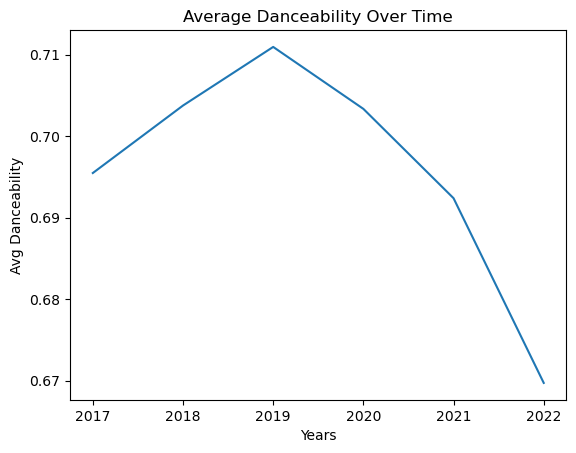

In [46]:
dance_avg_x = dance_df.index
dance_avg_y = dance_df["Mean Danceability"]
plt.plot(dance_avg_x, dance_avg_y)
plt.title("Average Danceability Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Danceability")
plt.savefig("../output_data/avg_dance.png")

In [47]:
# Summary statistics table for Energy 
energy_mean = spoti_df.groupby("Year")["energy"].mean()
energy_median = spoti_df.groupby("Year")["energy"].median()
energy_variance = spoti_df.groupby("Year")["energy"].var()
energy_std = spoti_df.groupby("Year")["energy"].std()
energy_sem = spoti_df.groupby("Year")["energy"].sem()

# Assembling the resulting series into a DataFrame
energy_df = pd.DataFrame({"Mean Energy": energy_mean, 
                          "Median Energy": energy_median, 
                          "Energy Variance": energy_variance, 
                          "Energy Std Dev": energy_std, 
                          "Energy Std Error": energy_sem})
energy_df.index.name = "Year"
energy_df

,Mean Energy,Median Energy,Energy Variance,Energy Std Dev,Energy Std Error
Year,,,,,
2017,0.63109,0.6525,0.025006,0.158134,0.015813
2018,0.66027,0.6760,0.019827,0.140807,0.014081
2019,0.61981,0.6275,0.026349,0.162323,0.016232
2020,0.61426,0.6270,0.024518,0.156581,0.015658
2021,0.61450,0.6175,0.021417,0.146345,0.014634
2022,0.63938,0.6720,0.026814,0.163749,0.016375


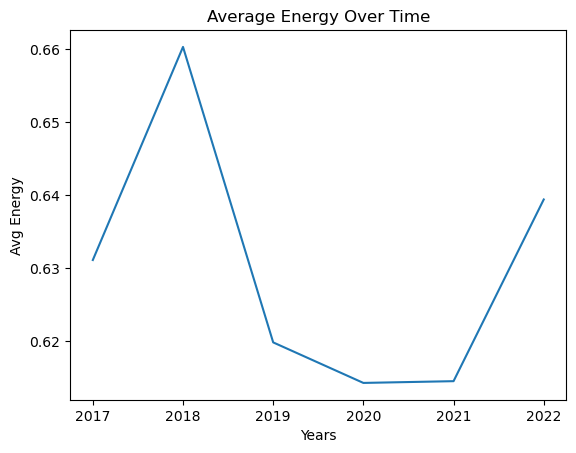

In [48]:
energy_avg_x = energy_df.index
energy_avg_y = energy_df["Mean Energy"]
plt.plot(energy_avg_x, energy_avg_y)
plt.title("Average Energy Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Energy")
plt.savefig("../output_data/avg_energy.png")

In [49]:
# Summary statistics table for Liveness 
live_mean = spoti_df.groupby("Year")["liveness"].mean()
live_median = spoti_df.groupby("Year")["liveness"].median()
live_variance = spoti_df.groupby("Year")["liveness"].var()
live_std = spoti_df.groupby("Year")["liveness"].std()
live_sem = spoti_df.groupby("Year")["liveness"].sem()

# Assembling the resulting series into a DataFrame
live_df = pd.DataFrame({"Mean Liveness": live_mean, 
                        "Median Liveness": live_median, 
                        "Liveness Variance": live_variance, 
                        "Liveness Std Dev": live_std, 
                        "Liveness Std Error": live_sem})
live_df.index.name = "Year"
live_df

,Mean Liveness,Median Liveness,Liveness Variance,Liveness Std Dev,Liveness Std Error
Year,,,,,
2017,0.154736,0.1225,0.009066,0.095217,0.009522
2018,0.165453,0.1195,0.015924,0.126190,0.012619
2019,0.152862,0.1110,0.012987,0.113959,0.011396
2020,0.173261,0.1135,0.020173,0.142032,0.014203
2021,0.162127,0.1215,0.012865,0.113424,0.011342
2022,0.171964,0.1180,0.014170,0.119036,0.011904


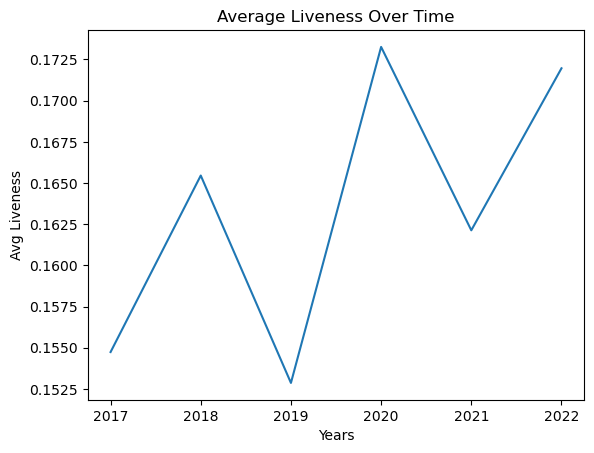

In [50]:
live_avg_x = live_df.index
live_avg_y = live_df["Mean Liveness"]
plt.plot(live_avg_x, live_avg_y)
plt.title("Average Liveness Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Liveness")
plt.savefig("../output_data/avg_live.png")

In [51]:
# Summary statistics table for Valence 
vale_mean = spoti_df.groupby("Year")["valence"].mean()
vale_median = spoti_df.groupby("Year")["valence"].median()
vale_variance = spoti_df.groupby("Year")["valence"].var()
vale_std = spoti_df.groupby("Year")["valence"].std()
vale_sem = spoti_df.groupby("Year")["valence"].sem()

# Assembling the resulting series into a DataFrame
vale_df = pd.DataFrame({"Mean Valence": vale_mean, 
                        "Median Valence": vale_median, 
                        "Valence Variance": vale_variance, 
                        "Valence Std Dev": vale_std, 
                        "Valence Std Error": vale_sem})
vale_df.index.name = "Year"
vale_df

,Mean Valence,Median Valence,Valence Variance,Valence Std Dev,Valence Std Error
Year,,,,,
2017,0.464541,0.4400,0.050401,0.224501,0.022450
2018,0.467752,0.4615,0.042860,0.207028,0.020703
2019,0.482704,0.4930,0.050471,0.224658,0.022466
2020,0.510914,0.5150,0.050113,0.223860,0.022386
2021,0.488950,0.4760,0.054191,0.232789,0.023279
2022,0.515557,0.5180,0.069016,0.262708,0.026271


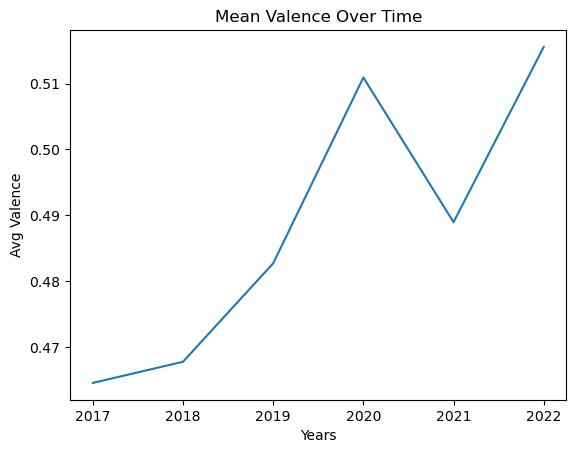

In [52]:
vale_avg_x = vale_df.index
vale_avg_y = vale_df["Mean Valence"]
plt.plot(vale_avg_x, vale_avg_y)
plt.title("Mean Valence Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Valence")
plt.savefig("../output_data/avg_vale.png")

In [53]:
# Summary statistics table for Tempo 
tempo_mean = spoti_df.groupby("Year")["tempo"].mean()
tempo_median = spoti_df.groupby("Year")["tempo"].median()
tempo_variance = spoti_df.groupby("Year")["tempo"].var()
tempo_std = spoti_df.groupby("Year")["tempo"].std()
tempo_sem = spoti_df.groupby("Year")["tempo"].sem()

# Assembling the resulting series into a DataFrame
tempo_df = pd.DataFrame({"Mean Tempo": tempo_mean, 
                         "Median Tempo": tempo_median, 
                         "Tempo Variance": tempo_variance, 
                         "Tempo Std Dev": tempo_std, 
                         "Tempo Std Error": tempo_sem})
tempo_df.index.name = "Year"
tempo_df

,Mean Tempo,Median Tempo,Tempo Variance,Tempo Std Dev,Tempo Std Error
Year,,,,,
2017,122.08699,121.0190,779.614386,27.921576,2.792158
2018,117.45763,115.5140,794.039002,28.178698,2.817870
2019,120.02856,114.6750,878.829134,29.645052,2.964505
2020,120.34594,117.9605,645.563293,25.407938,2.540794
2021,119.38212,118.0710,768.935593,27.729688,2.772969
2022,124.78068,121.4290,902.711967,30.045165,3.004517


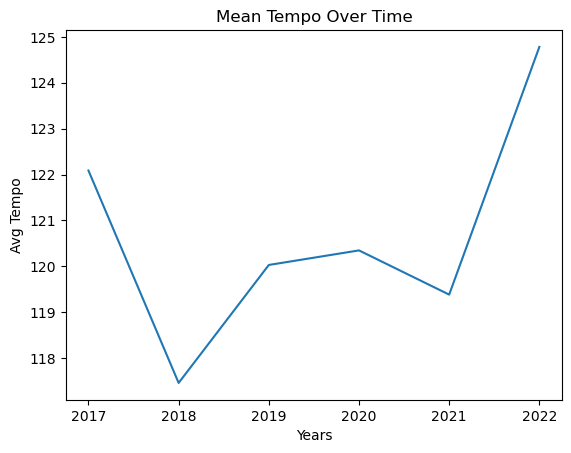

In [54]:
tempo_avg_x = tempo_df.index
tempo_avg_y = tempo_df["Mean Tempo"]
plt.plot(tempo_avg_x, tempo_avg_y)
plt.title("Mean Tempo Over Time")
plt.xlabel("Years")
plt.ylabel("Avg Tempo")
plt.savefig("../output_data/avg_tempo.png")

#### Now look at these features for each genre, so that we can see how these compare with overall trends in track features across the past 6 years.

In [55]:
# create a df for each genre
pop_features = genre_df[genre_df["artist genre"] == "pop"]
rap_features = genre_df[genre_df["artist genre"] == "rap"]
hip_hop_features = genre_df[genre_df["artist genre"] == "hip hop"]
canadian_pop_features = genre_df[genre_df["artist genre"] == "canadian pop"]
edm_features = genre_df[genre_df["artist genre"] == "edm"]
dance_pop_features = genre_df[genre_df["artist genre"] == "dance pop"]

In [56]:
# as we will do the same analysis for each genre, we are defining a function

# the function takes arguments df (dataframe with track features for a specific genre) and genre (string with genre name)

def genre_feats(df, genre):
    
    # calculate average for each feature per year
    danceability = df.groupby("Year", as_index = True)["danceability"].mean()
    energy = df.groupby("Year", as_index = True)["energy"].mean()
    liveness = df.groupby("Year", as_index = True)["liveness"].mean()
    valence = df.groupby("Year", as_index = True)["valence"].mean()
    tempo = df.groupby("Year", as_index = True)["tempo"].mean()
    duration = df.groupby("Year", as_index = True)["duration_ms"].mean()
    
    # plot features 
    years = [2017, 2018, 2019, 2020, 2021, 2022]

    fig, axs = plt.subplots(2, 3)
    axs[0,0].plot(years, danceability)
    axs[0,0].set_title('Danceability')
    axs[0,1].plot(years, energy)
    axs[0,1].set_title('Energy')
    axs[0,2].plot(years, liveness)
    axs[0,2].set_title('Liveness')
    axs[1,0].plot(years, valence)
    axs[1,0].set_title('Valence')
    axs[1,1].plot(years, tempo)
    axs[1,1].set_title('Tempo')
    axs[1,2].plot(years, duration)
    axs[1,2].set_title('Duration')

    # fine tune it
    fig.tight_layout(h_pad=1.8)
    fig.supxlabel('Year', y = -0.03)
    fig.supylabel('Average values', x = -0.02)
    plt.suptitle(f"{genre} features per year", y = 1.05)

    # save figure
    fig.savefig(f"../output_data/{genre}_features.png", bbox_inches='tight')

    # plot figure
    plt.show()

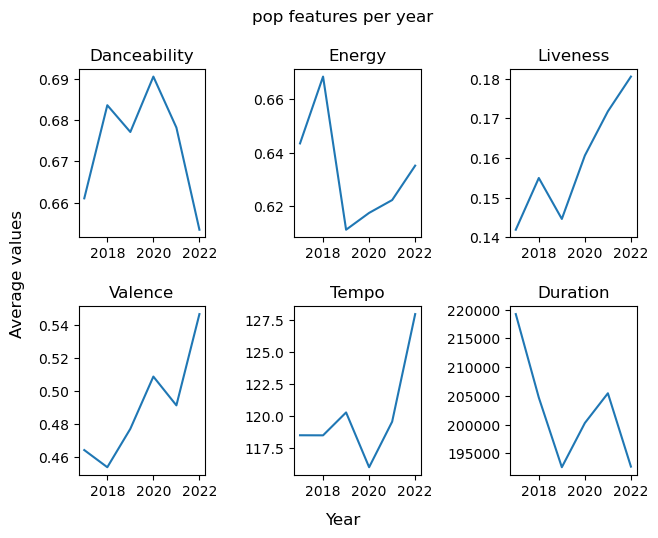

In [57]:
# plot pop features
genre_feats(pop_features, "pop")

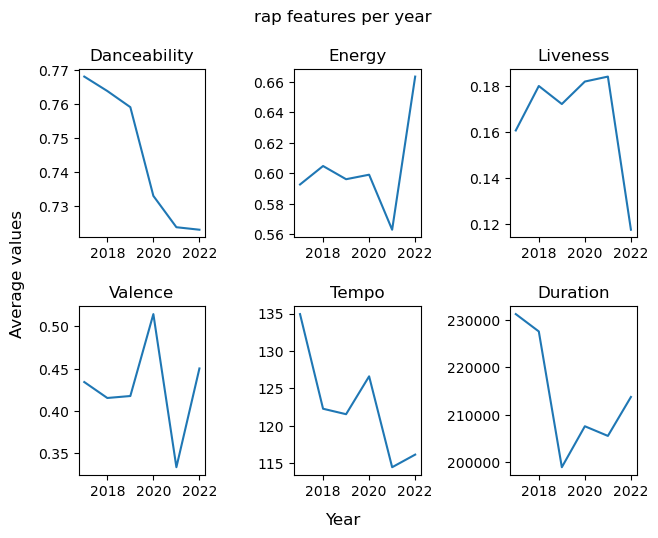

In [58]:
# plot rap features
genre_feats(rap_features, "rap")

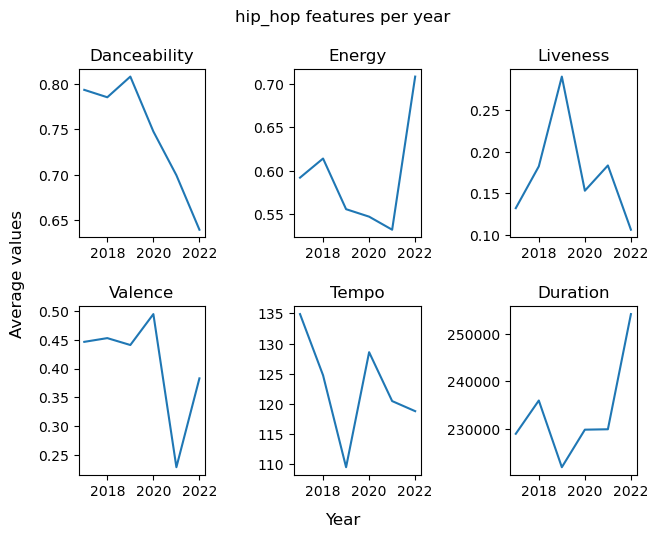

In [59]:
# plot hip hop features
genre_feats(hip_hop_features, "hip_hop")

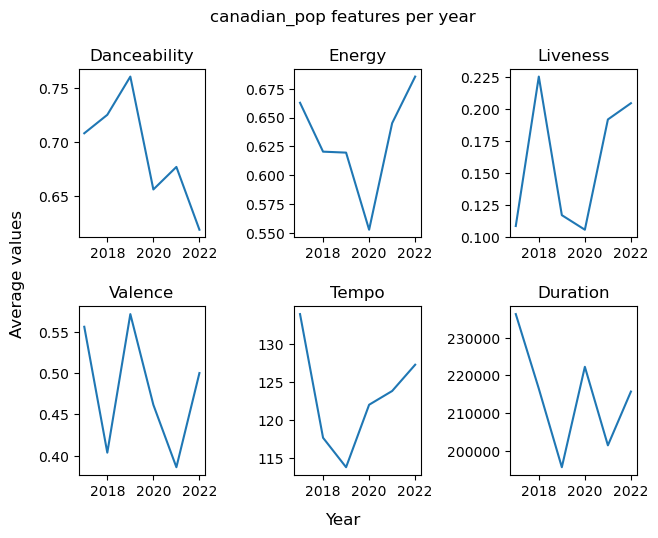

In [60]:
# plot canadian pop features
genre_feats(canadian_pop_features, "canadian_pop")

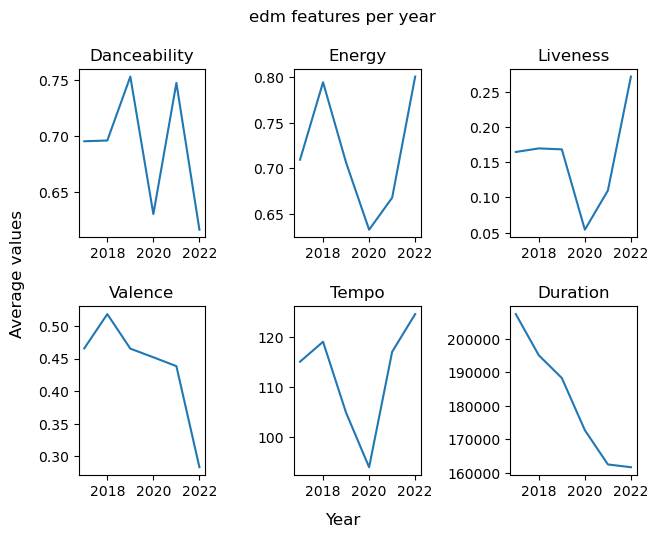

In [61]:
# plot edm features
genre_feats(edm_features, "edm")

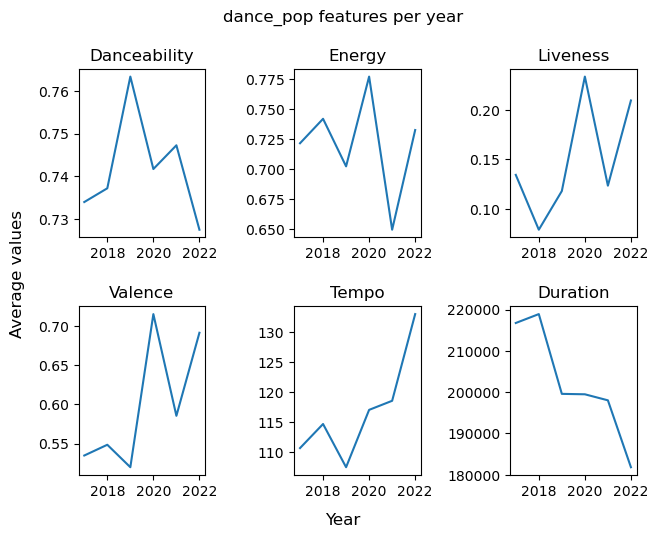

In [62]:
# plot dance pop features
genre_feats(dance_pop_features, "dance_pop")

Linear Regression Function

In [77]:
def lin_regress(x, y):
    correlation = st.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, correlation
print(lin_regress)

<function lin_regress at 0x00000272A3B40DC0>


Year Specific DataFrames

A series of DataFrames spliting the inital frame by years

In [83]:
#Dataframes for years
sev_teen_df = spoti_df.loc[spoti_df["Year"] == 2017]
ate_teen_df = spoti_df.loc[spoti_df["Year"] == 2018]
nine_teen_df = spoti_df.loc[spoti_df["Year"] == 2019]
twenty_df = spoti_df.loc[spoti_df["Year"] == 2020]
twenty_one_df = spoti_df.loc[spoti_df["Year"] == 2021]
twenty_two_df = spoti_df.loc[spoti_df["Year"] == 2022]

Aspect Years scatter plots

A series of charts showing danceability vs energy for each year, different aspects could be use, I feel that these we're good aspects to put against each other

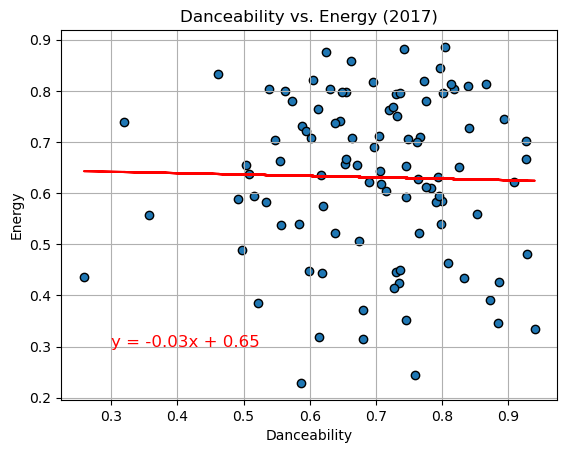

The R value is: -0.023018573132081735


In [84]:
plt.scatter(sev_teen_df["danceability"], sev_teen_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2017)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(sev_teen_df["danceability"], sev_teen_df["energy"])
plt.plot(sev_teen_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.3, 0.3), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2017_scat.png")
plt.show()
print("The R value is:", r_value[0])

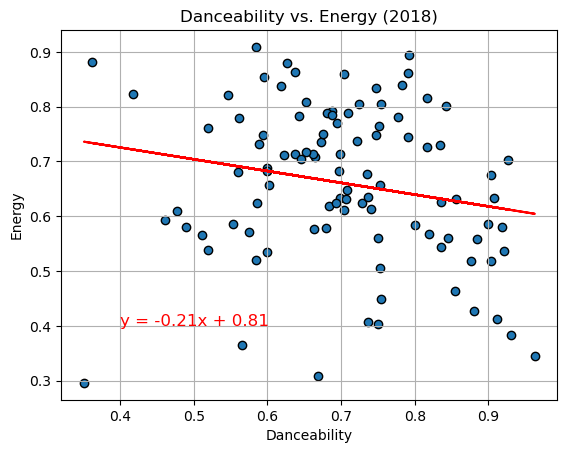

In [85]:
plt.scatter(ate_teen_df["danceability"], ate_teen_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2018)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(ate_teen_df["danceability"], ate_teen_df["energy"])
plt.plot(ate_teen_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2018_scat.png")
plt.show()


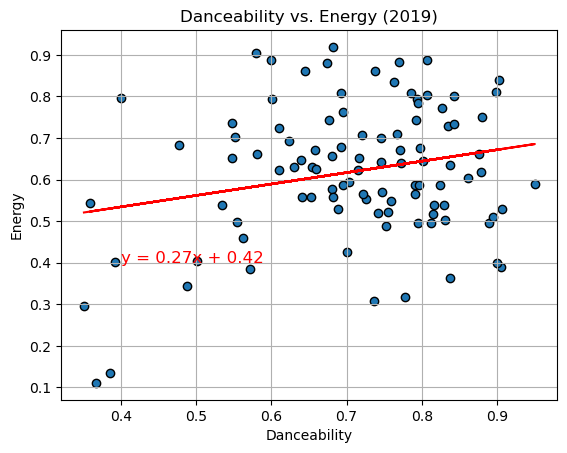

The R value is: 0.23012466442593973


In [86]:
plt.scatter(nine_teen_df["danceability"], nine_teen_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2019)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(nine_teen_df["danceability"], nine_teen_df["energy"])
plt.plot(nine_teen_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2019_scat.png")
plt.show()
print("The R value is:", r_value[0])

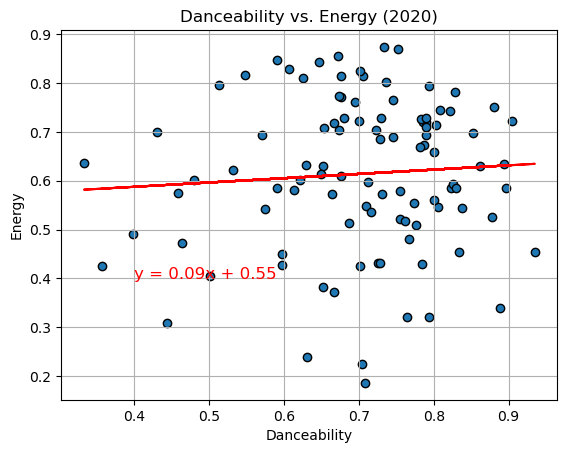

The R value is: 0.06970148338026907


In [87]:
plt.scatter(twenty_df["danceability"], twenty_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2020)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_df["danceability"], twenty_df["energy"])
plt.plot(twenty_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2020_scat.png")
plt.show()
print("The R value is:", r_value[0])

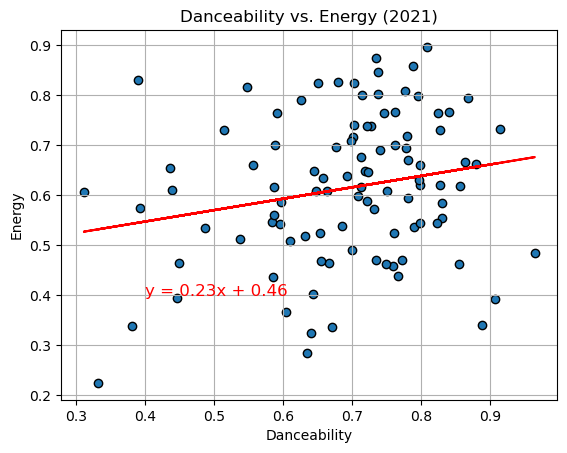

The R value is: 0.20665093004800486


In [88]:
plt.scatter(twenty_one_df["danceability"], twenty_one_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2021)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_one_df["danceability"], twenty_one_df["energy"])
plt.plot(twenty_one_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2021_scat.png")
plt.show()
print("The R value is:", r_value[0])

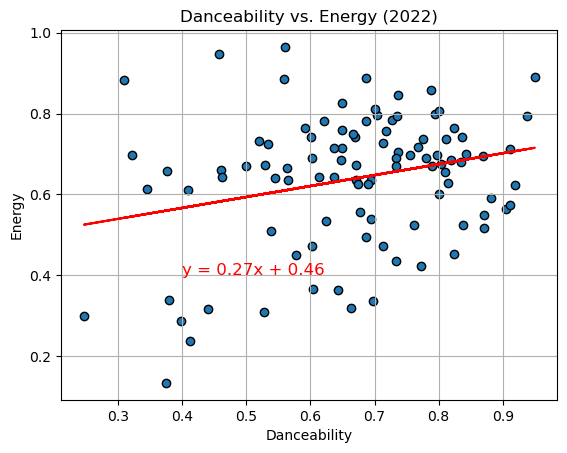

The R value is: 0.2588151516767542


In [89]:
plt.scatter(twenty_two_df["danceability"], twenty_two_df["energy"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Danceability vs. Energy (2022)")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_two_df["danceability"], twenty_two_df["energy"])
plt.plot(twenty_two_df["danceability"], lin_r, color = "red")
plt.annotate(lin_r_eq, (0.4, 0.4), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/D_vs_E_2022_scat.png")
plt.show()
print("The R value is:", r_value[0])

Duration vs Tempo each year

A series of scatters for dance vs tempo each year

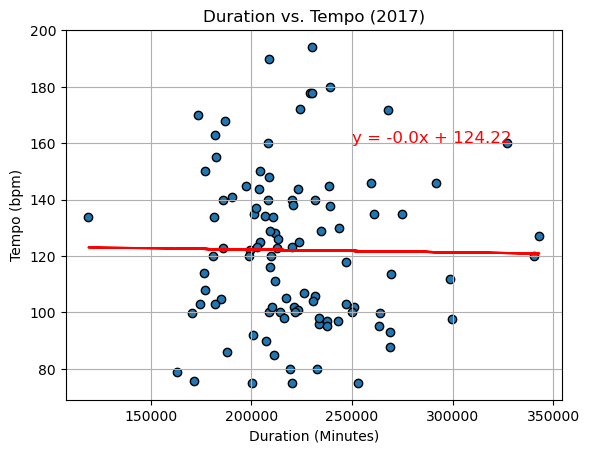

The R value is: -0.01266869324946365


In [90]:
plt.scatter(sev_teen_df["duration_ms"], sev_teen_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2017)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(sev_teen_df["duration_ms"], sev_teen_df["tempo"])
plt.plot(sev_teen_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2017_scat.png")
plt.show()
print("The R value is:", r_value[0])

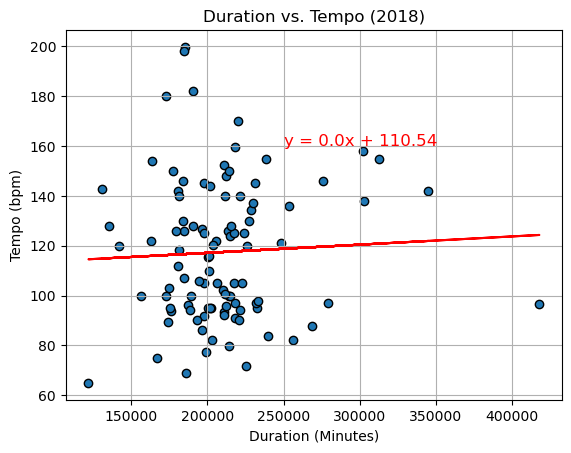

The R value is: 0.04836732278871976


In [91]:
plt.scatter(ate_teen_df["duration_ms"], ate_teen_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2018)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(ate_teen_df["duration_ms"], ate_teen_df["tempo"])
plt.plot(ate_teen_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2018_scat.png")
plt.show()
print("The R value is:", r_value[0])

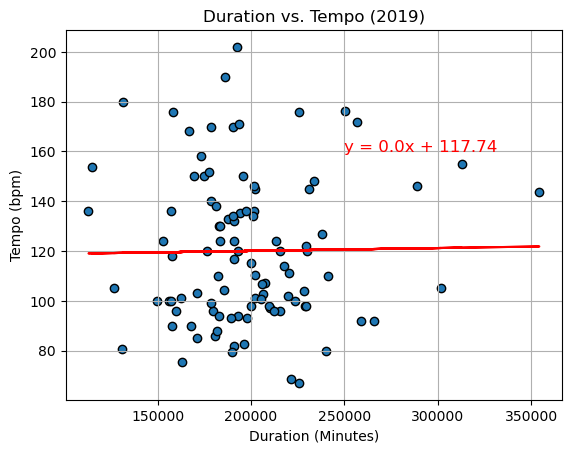

In [92]:
plt.scatter(nine_teen_df["duration_ms"], nine_teen_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2019)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(nine_teen_df["duration_ms"], nine_teen_df["tempo"])
plt.plot(nine_teen_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2019_scat.png")
plt.show()

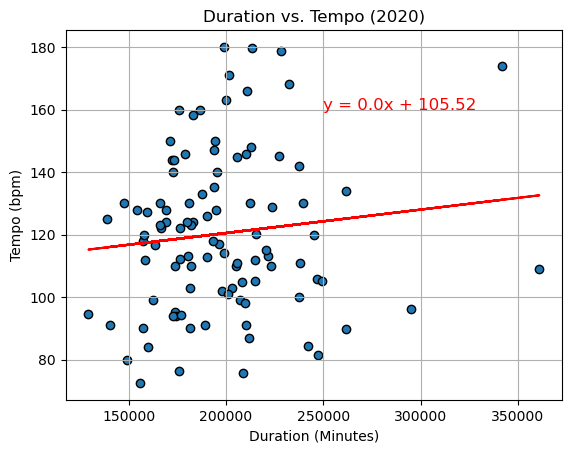

The R value is: 0.11025461162984755


In [93]:
plt.scatter(twenty_df["duration_ms"], twenty_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2020)")
plt.xlabel('Duration (Minutes)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_df["duration_ms"], twenty_df["tempo"])
plt.plot(twenty_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 160), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2020_scat.png")
plt.show()
print("The R value is:", r_value[0])

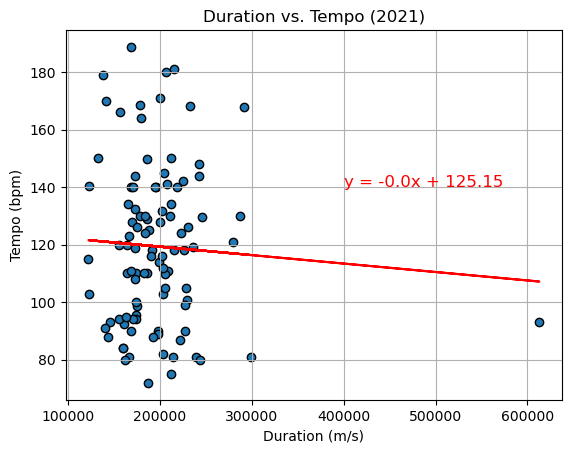

In [94]:
plt.scatter(twenty_one_df["duration_ms"], twenty_one_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2021)")
plt.xlabel('Duration (m/s)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_one_df["duration_ms"], twenty_one_df["tempo"])
plt.plot(twenty_one_df["duration_ms"], lin_r, color = "red")
slope_2021 = plt.annotate(lin_r_eq, (400000, 140), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2021_scat.png")
plt.show()

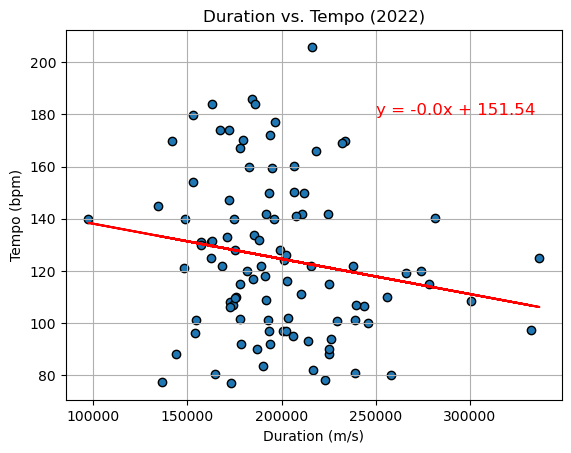

In [95]:
plt.scatter(twenty_two_df["duration_ms"], twenty_two_df["tempo"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("Duration vs. Tempo (2022)")
plt.xlabel('Duration (m/s)')
plt.ylabel('Tempo (bpm)')
plt.grid(True)
lin_r, lin_r_eq, r_value = lin_regress(twenty_two_df["duration_ms"], twenty_two_df["tempo"])
plt.plot(twenty_two_df["duration_ms"], lin_r, color = "red")
plt.annotate(lin_r_eq, (250000, 180), color = "red", fontsize = 12)
# Save the figure
plt.savefig("../output_data/Dur_vs_Temp_2022_scat.png")
plt.show()

# Conclusions

In this project we aimed to investigate how people's listening habits have changes in the past 6 years. 

We posited the following questions and from our data analyses can derive the following conclusions:


### 1. Have the music genres people listen to changed?
- Pop and rap consistently occupy the first two positions in the top of the most listened to genres 
- A lot of sub-genres of pop seem to rise around the period of covid (e.g. canadian pop, dance pop, etc), and whilst some of these sub-genres - like Canadian pop remain popular after covid, others like dance pop seem to have had a short-lived popularity
- In contrast, sub-genres of rap disappear. Perhaps associated to the rise of latin rap and other latino music, which gained a lot of popularity after COVID
- EDM decreases steadily before COVID, but in 2020 it disappears from the top 10. This music genre is largely driven by raves, so it is perhaps unsurprising that it disappear at a time were social gatherings are not allowed

### 2. Have the music artists people listen to changed?

- Artists songs seem to be getting shorter, so we explore song duration in more detail in the next question

### 3. Is the duration of the most popular songs decreasing?
- Songs are shorter! 
- Song duration does not correlate with track popularity. Although it is possible this might be related to the fact that our data only contains highly popular songs
- Song duration correlates strongly with number of Tik-Tok users, so that the higher the number of Tik-Tok users, the smaller the duration of the songs. 


### 4. How have other track features changed?
- From 2019 to 2022:
    - danceability and energy go down
    - liveness and valence go up
- None of the specific genres we look at seem to mirror the overall trend in the features

## Limitations & things to bear in mind
- we only have top songs (which are all popular), so we cant draw comparision with less popular songs
- our data shows the year a song was popular not when it was released
- we only have data for 6 years - a lot of these trends might be occuring for longer (as ref suggeste with music changing since 2000)